# Bi-Variate Regression - Effect on Sleep Efficiency Outcome
The purpose of this notebook is to look exclusively at how different variables are related to sleep efficiency. Based on a somewhat cursory analysis, sleep efficiency does not seem to be a good outcome variable. Perhaps looking into REM/nREM will be more appropriate.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import statsmodels.api as sm

## Data Import

In [2]:
df_py3 = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_adafruit_sleepstats',parse_dates=True,index_col=0)
df_py3['inc%'] = (df_py3['max'] - df_py3['min'])/df_py3['min']

In [36]:
df_py3['var'].unique()

array(['eCO2', 'Lux', 'Visible', 'Infrared', 'NO2', 'T_NO2', 'RH_NO2',
       'CO', 'T_CO', 'RH_CO', 'TVOC'], dtype=object)

In [43]:
df_py3[df_py3['var'] == 'T_NO2']

,ID,var,mean,median,max,min,std,inc%
sleep_day,,,,,,,,
2020-01-23,332b3bxa,T_NO2,20.734375,21.0,21.0,20.0,0.441665,0.050000
2020-02-01,332b3bxa,T_NO2,19.966667,20.0,21.0,19.0,0.781025,0.105263
2020-02-12,332b3bxa,T_NO2,23.500000,23.0,25.0,23.0,0.586302,0.086957
2020-02-22,332b3bxa,T_NO2,23.976471,24.0,24.0,23.0,0.151578,0.043478
2020-03-03,332b3bxa,T_NO2,25.712329,26.0,26.0,25.0,0.452677,0.040000
...,...,...,...,...,...,...,...,...
2020-01-23,daneytpw,T_NO2,21.896104,22.0,22.0,21.0,0.305126,0.047619
2020-02-02,daneytpw,T_NO2,23.000000,23.0,23.0,23.0,0.000000,0.000000
2020-02-12,daneytpw,T_NO2,20.988095,21.0,21.0,20.0,0.108458,0.050000


In [55]:
df_py2 = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_sensirion_sleepstats',parse_dates=True,index_col=0)
df_py2['inc%'] = (df_py2['max'] - df_py2['min'])/df_py2['min']

In [56]:
df_py2['var'].unique()

array(['Temperature [C]', 'Relative Humidity', 'CO2', 'PM_N_0p5',
       'PM_N_1', 'PM_N_2p5', 'PM_N_4', 'PM_N_10', 'PM_C_1', 'PM_C_2p5',
       'PM_C_4', 'PM_C_10'], dtype=object)

In [4]:
df_ss = pd.read_csv('/Users/hagenfritz/Projects/utx000/studies/cohort1/processed_data/study_sleepStagesDay.csv',parse_dates=True,index_col=0)

## One Variable Regression

In [19]:
def plotLinearRegression(X,xlim,Y,ylim,show_plot=True):
    '''
    Inputs:
        - X: list of values corresponding to the independent variable
        - xlim: list of two values specifying the lower and upper bounds of the horizontal axis
        - Y: list of values corresponding to the dependent variable
        - ylim: list of two values specifying the lower and upper bounds of the vertical axis
    Plots a linear regression of the two variables and returns the ax handle if successful, otherwise False
    '''
    
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)}, font_scale=1)
    
    try:
        if len(X) > 1:
            t = np.arange(len(X))
            X = sm.add_constant(X)
            model = sm.OLS(Y, X).fit()
            predictions = model.predict(X) # make the predictions by the model

            # Plotting
            if show_plot:
                ## Scatter
                fig,ax = plt.subplots(figsize=(10,10))
                ax.scatter(X[:,1],Y,c=t,s=100,cmap='Blues',edgecolor='black')

                ## Line of Best Fit
                ax.plot(X[:,1],predictions,color='red')

                top = 0
                bot = 0
                for i in range(len(predictions)):
                    top += (predictions[i]-np.mean(Y))**2
                    bot += (Y[i] - np.mean(Y))**2
                rsqrd = top/bot

                ## Formatting Remainder of Axis
                ax.set_xlim(xlim)
                ax.set_ylim(ylim)
                ### Print out the statistics
                loc_x = min(xlim)+0.01*(max(xlim)-min(xlim))
                loc_y = min(ylim)+0.01*(max(ylim)-min(ylim))
                ax.text(loc_x,loc_y+0.1*(max(ylim)-min(ylim)),'Intercept: ' + str(round(model.params[0],4)))
                ax.text(loc_x,loc_y+0.05*(max(ylim)-min(ylim)),'Slope: ' + str(round(model.params[1],4)))
                ax.text(loc_x,loc_y,'r$^2$: ' + str(round(rsqrd,4)))
                
                return ax, model
            else:
                return False, model
    except Exception as inst:
        print(inst)

        return False, False

# Python 3

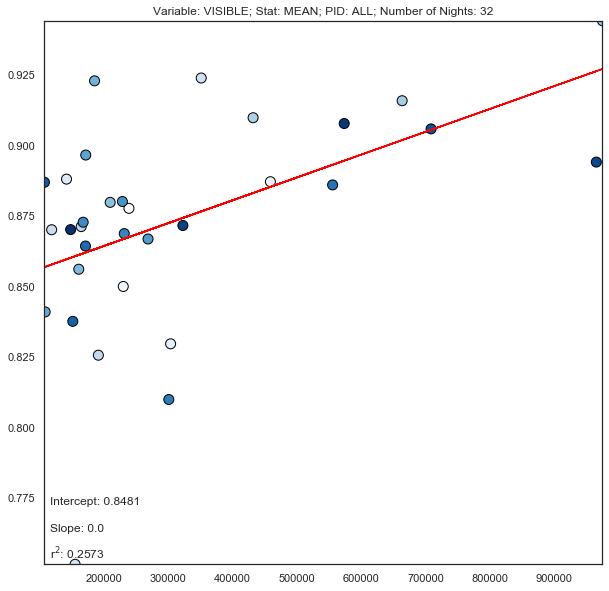

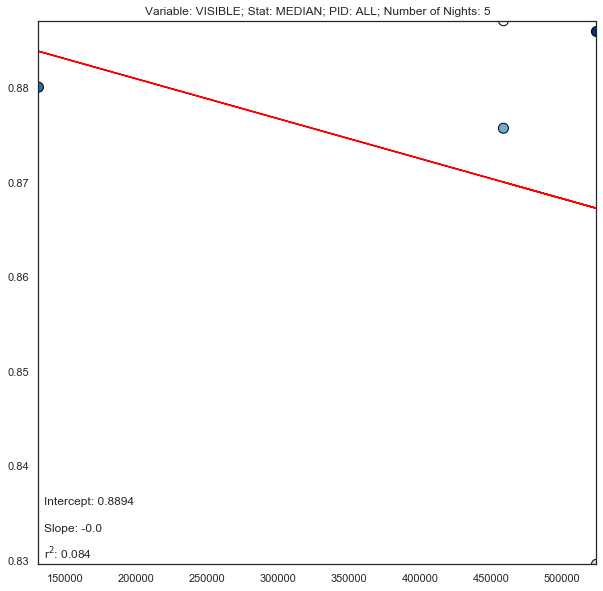

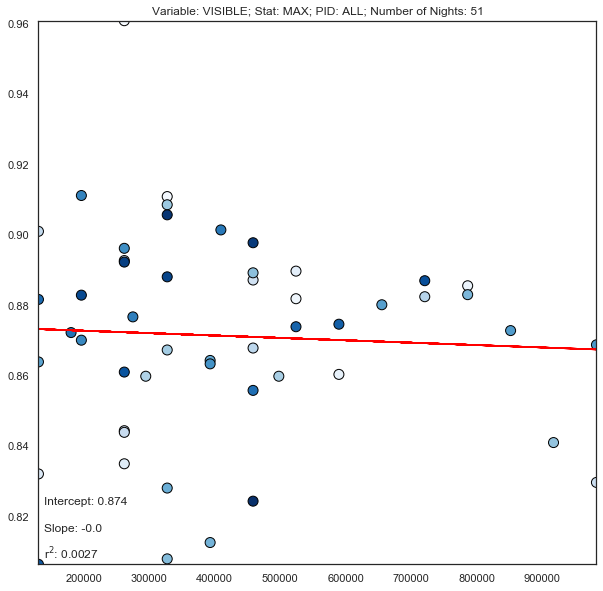

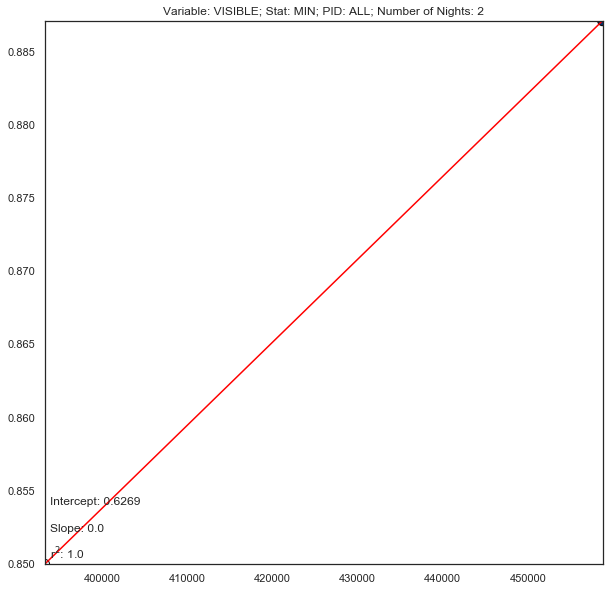

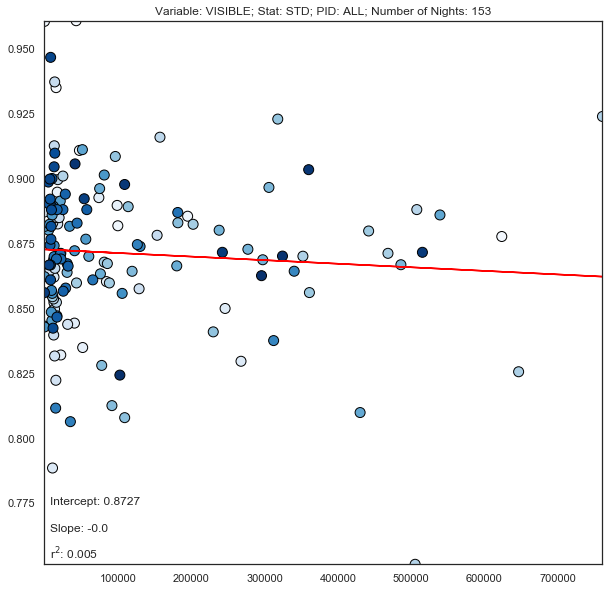

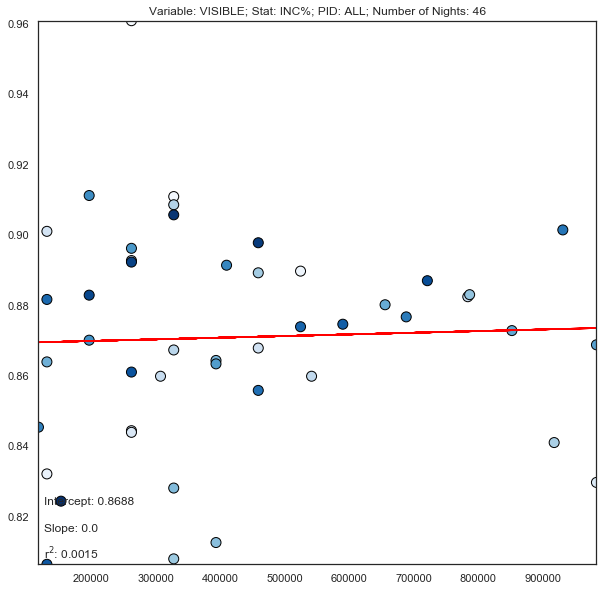

In [54]:
results_df = pd.DataFrame()
    
#var = 'TVOC'
#low_cutoffs = [0,0,0]
#high_cutoffs = [1000000,150,100]
#var = 'Lux'
#low_cutoffs = [50,20,10]
#high_cutoffs = [4000,1000,1000]
#var = 'T_NO2'
#low_cutoffs = [15,0.5,0.06]
#high_cutoffs = [4000,1000,1000]
#var = 'RH_NO2'
#low_cutoffs = [0,0,0]
#high_cutoffs = [4000,1000,1000]
var = 'Visible'
low_cutoffs = [100000,0,100000]
high_cutoffs = [1000000,1000000,1000000]
# Masking by variables - still has all participants
df_py3_byvar = df_py3[df_py3['var'] == var]

# Looping through all the statistics - skipping over the ID and var columns
for column in df_py3_byvar.columns:
    if column in ['ID','var']:
        continue

    # Looping through all the participants
    overall = pd.DataFrame()
    for pid in df_py3_byvar['ID'].unique():
        dep_vars_ind = df_py3_byvar[df_py3_byvar['ID'] == pid]
        indep_vars_ind = df_ss[df_ss['ID'] == pid]
        combined = pd.concat([dep_vars_ind,indep_vars_ind],join='inner',axis=1)

        # Removing data where the efficiency is less than zero
        combined = combined[combined['Efficiency'] > 0]
        
        # Removing outliers from summary stats
        if column in ['min','max','mean','median']:
            combined = combined[combined[column] > low_cutoffs[0]]
            combined = combined[combined[column] < high_cutoffs[0]]
        if column == 'std':
            combined = combined[combined[column] > low_cutoffs[1]]
            combined = combined[combined[column] < high_cutoffs[1]]
        if column == 'inc%':
            combined = combined[combined[column] > low_cutoffs[2]]
            combined = combined[combined[column] < high_cutoffs[2]]

        if len(combined) > 0:
            overall = pd.concat([overall,combined])

    X = overall[column].values
    y = overall['Efficiency'].values

    ax, model = plotLinearRegression(X,[min(X),max(X)],y,[min(y),max(y)],True)
    try:
        ax.set_title(f'Variable: {var.upper()}; Stat: {column.upper()}; PID: ALL; Number of Nights: {len(overall)}')
        plt.show()
        plt.close()
    except:
        pass

    onevar_df = pd.DataFrame(data={'Variable':[var],'Stat':[column.upper()],'Outcome':['sleep_efficiency'.upper()],
                                  'x0':[model.params[0]],'x1':[model.params[1]],'No. Points':[len(overall)],'Fit':[model.rsquared]})

    results_df = pd.concat([results_df,onevar_df])

In [51]:
results_df

,Variable,Stat,Outcome,x0,x1,No. Points,Fit
0,Visible,MEAN,SLEEP_EFFICIENCY,0.875892,-0.000001,74,0.007439
0,Visible,MEDIAN,SLEEP_EFFICIENCY,0.874756,-0.000008,50,0.012672


# Notes from the Analysis

## TVOC
No relationship seems to be that strong when looking at these variables. However, the TVOC sensors are not that accurate anyway.

## Lux and Visible
There would be reasoning to think that a high standard deviation would entail a poor sleep, but the data do not support the idea. However, there does seem to be a link between the mean light level and the sleep efficiency although data are limited. The same conclusion can be said about the mean Visible value. 

## T and RH
Surprisingly there seems to be no relationship between T/RH and sleep efficiency. Perhaps they would be more telling when looking at individual sleep stages. 

# Python 2

In [61]:
df_py2['var'].unique()

array(['Temperature [C]', 'Relative Humidity', 'CO2', 'PM_N_0p5',
       'PM_N_1', 'PM_N_2p5', 'PM_N_4', 'PM_N_10', 'PM_C_1', 'PM_C_2p5',
       'PM_C_4', 'PM_C_10'], dtype=object)

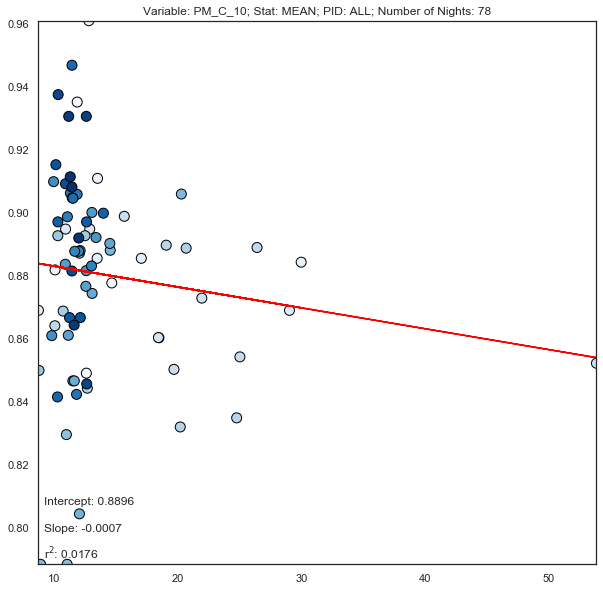

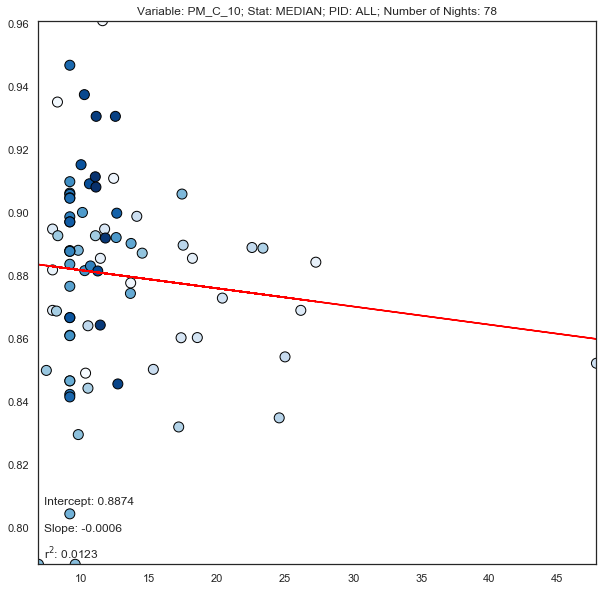

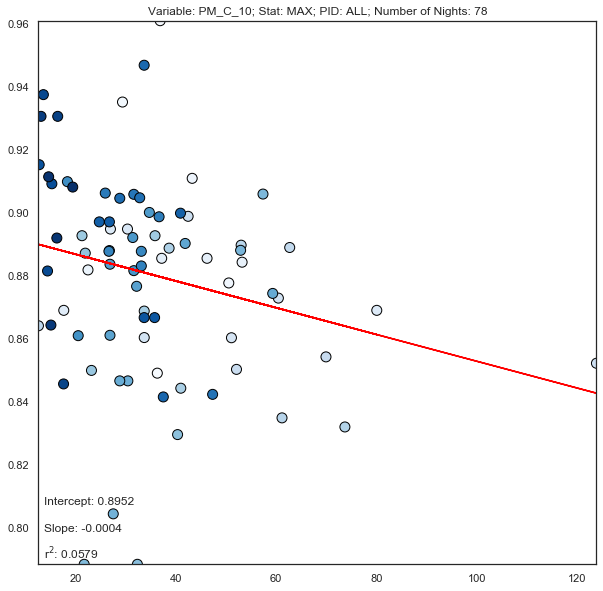

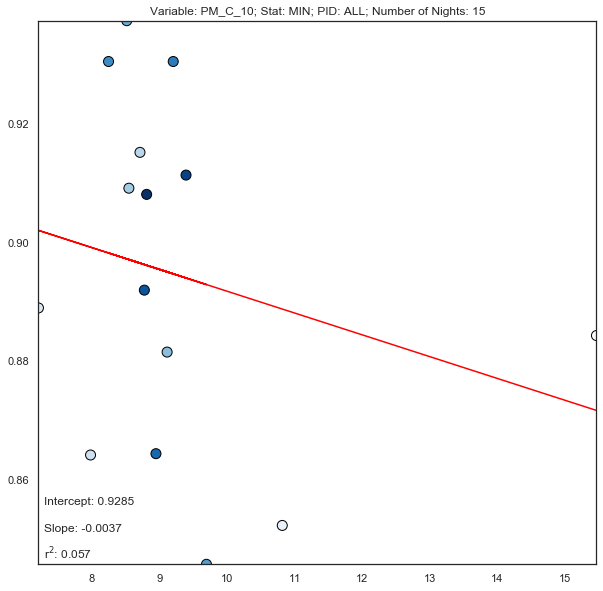

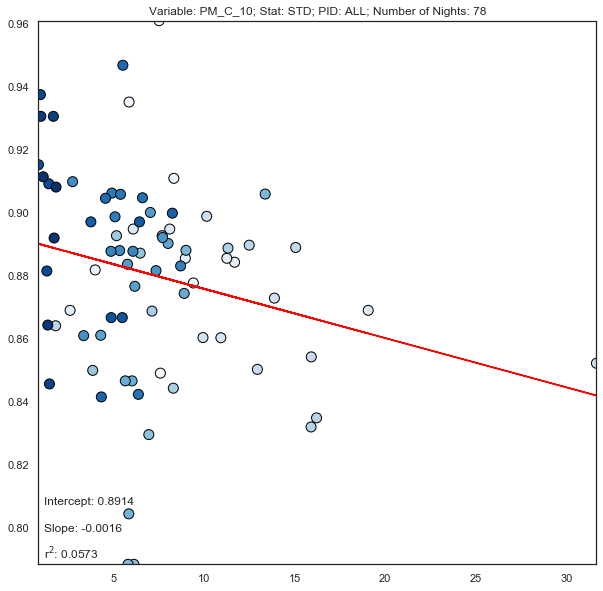

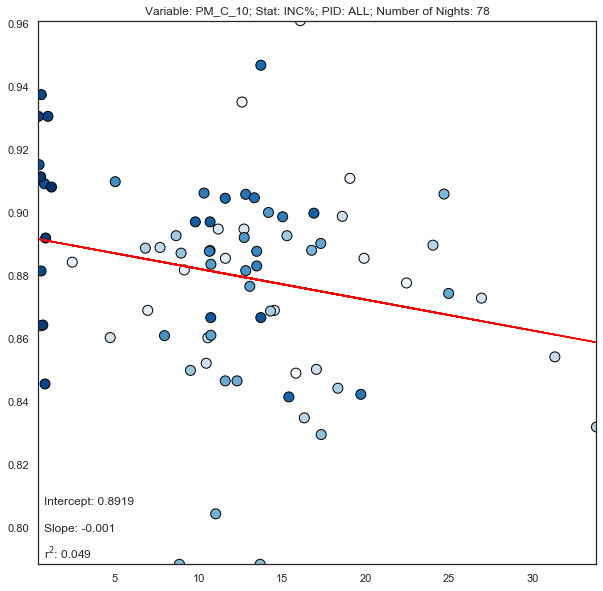

In [84]:
results_df = pd.DataFrame()
    
#var = 'Temperature [C]'
#low_cutoffs = [15,0,0.05]
#high_cutoffs = [1000000,150,0.25]

var = 'Relative Humidity'
low_cutoffs = [0,0,0]
high_cutoffs = [1000000,150,1000]

var = 'CO2'
low_cutoffs = [1000,0,0]
high_cutoffs = [1000000,150,2]

var = 'PM_C_10'
low_cutoffs = [6,0,0]
high_cutoffs = [1000000,150,200]

# Masking by variables - still has all participants
df_py2_byvar = df_py2[df_py2['var'] == var]

# Looping through all the statistics - skipping over the ID and var columns
for column in df_py2_byvar.columns:
    if column in ['ID','var']:
        continue

    # Looping through all the participants
    overall = pd.DataFrame()
    for pid in df_py2_byvar['ID'].unique():
        dep_vars_ind = df_py2_byvar[df_py2_byvar['ID'] == pid]
        indep_vars_ind = df_ss[df_ss['ID'] == pid]
        combined = pd.concat([dep_vars_ind,indep_vars_ind],join='inner',axis=1)

        # Removing data where the efficiency is less than zero
        combined = combined[combined['Efficiency'] > 0]
        
        # Removing outliers from summary stats
        if column in ['min','max','mean','median']:
            combined = combined[combined[column] > low_cutoffs[0]]
            combined = combined[combined[column] < high_cutoffs[0]]
        if column == 'std':
            combined = combined[combined[column] > low_cutoffs[1]]
            combined = combined[combined[column] < high_cutoffs[1]]
        if column == 'inc%':
            combined = combined[combined[column] > low_cutoffs[2]]
            combined = combined[combined[column] < high_cutoffs[2]]

        if len(combined) > 0:
            overall = pd.concat([overall,combined])

    X = overall[column].values
    y = overall['Efficiency'].values

    ax, model = plotLinearRegression(X,[min(X),max(X)],y,[min(y),max(y)],True)
    try:
        ax.set_title(f'Variable: {var.upper()}; Stat: {column.upper()}; PID: ALL; Number of Nights: {len(overall)}')
        plt.show()
        plt.close()
    except:
        pass

    onevar_df = pd.DataFrame(data={'Variable':[var],'Stat':[column.upper()],'Outcome':['sleep_efficiency'.upper()],
                                  'x0':[model.params[0]],'x1':[model.params[1]],'No. Points':[len(overall)],'Fit':[model.rsquared]})

    results_df = pd.concat([results_df,onevar_df])

In [85]:
results_df

,Variable,Stat,Outcome,x0,x1,No. Points,Fit
0,PM_C_10,MEAN,SLEEP_EFFICIENCY,0.889582,-0.000661,78,0.017635
0,PM_C_10,MEDIAN,SLEEP_EFFICIENCY,0.887432,-0.000575,78,0.012256
0,PM_C_10,MAX,SLEEP_EFFICIENCY,0.895191,-0.000423,78,0.057884
0,PM_C_10,MIN,SLEEP_EFFICIENCY,0.928523,-0.003680,15,0.056988
0,PM_C_10,STD,SLEEP_EFFICIENCY,0.891399,-0.001561,78,0.057303
0,PM_C_10,INC%,SLEEP_EFFICIENCY,0.891949,-0.000980,78,0.049018


## Notes from Analysis

### Temperature
Surprisingly there doesn't seem to be any association between sleep efficiency and temperature

### RH
No clear result here either.

### CO2
Not as large of a relationship here either.

### PM2.5 and PM10
These don't seem to be good predictors for sleep efficiency either.